# Synthetic seismogram

## Overview

When reflection seismic data are collected, a geophones are laid out, and a source (such as dynamite or a vibroseis truck) sends a wavelet into the subsurface. <br/>

The wavelet reflects off interfaces separating units with differing acoustic impedances. A reflection seismic survey will consist of multiple shots over the survey area. 
<div align="center">
    <img width=600 src="http://oceansjsu.com/images/NanTroSEIZE/21_interpretation_volume_cutaway/cutaway_3D_1000.jpg" title="NanTroSEIZE 3D seismic data volume "</img>
    <small>source: [media marine](http://media.marine-geo.org)</small>
</div>
<br/>For this notebook, we will consider a 2D seismic line, where sources and receivers are positioned along a straight line.
<br/><br/>
Reflection seismology is the workhorse geophysical technique for oil and gas exploration. Seismic sections or volumes, such as that shown in the top figure, are interpreted for geologic structure and other geologic features. Each of the traces composing the volume is an ideal normal-incidence seismogram.<br/><br/>
We will be investigating geologic factors that impact the character of a seismogram and walk through how a seismogram is generated from the collected data.

This notebook is based on the [Lab5 material](http://www.eos.ubc.ca/courses/eosc350/content/2014/labs/Lab5/Lab5.pdf) from Dominique Fournier, University of British Columbia.
<br/><br/>
As usual we first start by importing the necessary packages:

In [3]:
# Import the necessary packages
import sys; sys.path.append("/home/ubuntu/notebook/GEOS3102-GlobalEnergyResources/Seismic/Python")
%pylab inline                            
from syntheticSeismogramImport import *  

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Constructing a Synthetic Seismogram

We will consider a model consisting of two horizontal layers over a half-space. Each layer has density $\rho_i$ and seismic velocity $v_i$. In this notebook, we will start from the physical property model and walk through how to construct a synthetic, normal incidence seismogram. 

<img src="./Figures/geoModel.png" style="width: 50%; height: 50%"></img>

## Step 1: From Physical Properties to a Reflectivity Series

We begin by constructing a reflectivity series from the physical property model. The physical properties characterizing the model are:
- density ($\rho$) and 
- seismic velocity ($v$)

The acoustic impedance of each layer is:
$$
Z_i = \rho_i v_i
$$

From acoustic impedance, the down-going reflection coefficient for each interface is given by
$$
r_{i,i+1} = \frac{Z_{i+1}-Z_i}{Z_{i+1}+Z_i}
$$

and the transmission coefficient is
$$
t_{i,i+1} = \frac{2Z_{i}}{Z_{i+1}+Z_i}
$$

<img src="./Figures/rt1interface.png" style="width: 40%; height: 40%"></img>

The true reflectivity accounts for both reflection and transmission. For the reflection off of the first layer, these are equivalent. For the reflection off of the second interface, the reflection coefficient $r_{2,3}$ in multiplied by $t_{1,2}t_{2,1}$ to get the true reflectivity. In the below plot, this effect of the transmission coefficients can be included or not using the toggle "usingT."

<img src="./Figures/rt2interface.png" style="width: 40%; height: 40%"></img>



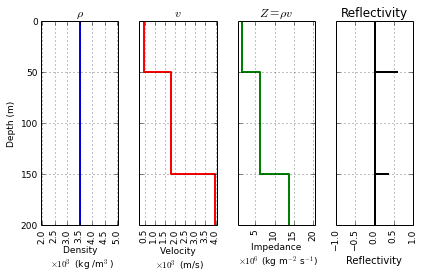

In [4]:
# Create Interactive Plot for Logs
logs = interact(plotLogsInteract,d2=(0.,100.,5),d3=(100.,200.,5),rho1=(2000.,5000.,50.),rho2=(2000.,5000.,50.),rho3=(2000.,5000.,50.),v1=(300.,4000.,50.),v2=(300.,4000.,50.),v3=(300.,4000.,50.))

<font color='red'> **Adjust the slide-bars to help answer the following questions. (_Note_: When “usingT” is off, which is the default, the reflectivity is simply the reflection coefficients at each interface.)**</font>
<br/><br/>
<font color='red'>
**a. Start with equal density (rho1 = rho2 = rho3) for all layers and adjust the velocity (v1, v2, v3) of the layers. What is required for the reflection coefficients to be positive?, negative? What is required to have two reflection coefficients of opposite sign?
<br/><br/>
b. Now pick a constant velocity and adjust the density of the layers. What is required for the reflection coefficients to be positive?, negative? What is required to have reflection coefficients of opposite sign?<br/><br/>
c. In general, both density and velocity vary between geologic units. What is required of the denisty and velocity for the reflection coefficients to be positive?, negative?, opposite in sign?<br/><br/>
d. Build a few models and turn the transmission coefficients on and off using the “usingT” toggle. When do you notice a large difference between the reflectivity series generated when transmission coefficients are ignored and included?<br/><br/>
e. The amplitude of the signal which is reflected off of each interface can be written in terms of down-going reflection coefficients only (ie. r1,2 and r2,3). If the input pulse amplitude is 1, what is the recorded amplitude of the event which reflects off of interface 1 (in terms of r1,2)? What is the recorded amplitude of the event which reflects off of interface 2 (in terms of r1,2,r2,3)?<br/><br/>**</font>

## Step 2: Converting from Depth to Time

Now we have the reflectivity series as a function of depth. With seismic, we measure a signal as a function of time. So we must apply a conversion from depth to time. We do this by computing the time it takes for a signal to reach a given depth and return to the surface. 

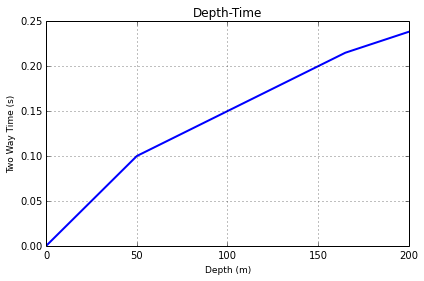

In [5]:
# Create depth-time interactive plot
interact(plotTimeDepthInteract,d2=(0.,100.,5),d3=(100.,200.,5),v1=(300.,4000.,50.),v2=(300.,4000.,50.),v3=(300.,4000.,50.))

You can adjust the depth to the layer interfaces and the velocity of each layer. 
<br/><br/>
<font color='red'> **If you adjust the velocities of the three layers, you will see that the depth-time curve is composed of 3 line segments with different slopes. What is the slope of each of the line segments in terms of the physical properties of each of the layers?**</font>

## Step 3: Wavelet * Reflectivity = Seismogram

Now that we have the reflectivity series in time, the next step is to choose the input pulse and construct our seismogram. For the following examples, we will use a <a href="http://subsurfwiki.org/wiki/Ricker_wavelet">Ricker Wavelet</a> with peak frequency $f$. 

A seismogram is the convolution of the wavelet and reflectivity series. Here, you can adjust the peak frequency (wavF) of the wavelet and its amplitude (wavA). 

The geologic model used is:
<img src="./Figures/Step3FixedMod.png" style="width: 50%; height: 50%"></img>

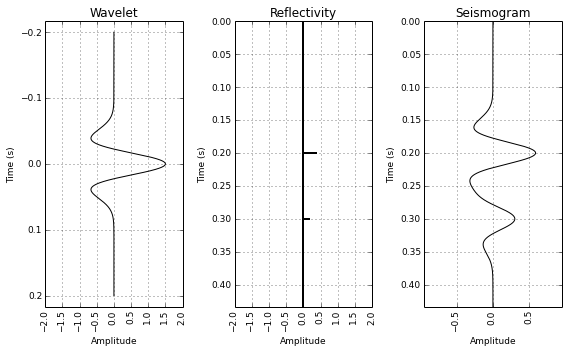

In [6]:
# Interactive seismogram plot for a fixed geologic model
interact(plotSeismogramInteractFixMod,wavf=(5.,100.,5.),wavA=(-2.,2.,0.25))

<font color='red'>
**a. Adjust the amplitude of the input pulse. How does this affect resulting seismogram? <br/><br/>
b. Adjust the frequency of the input pulse. What causes the width of the pulse recorded on the seismogram increase? decrease?**</font>

## Step 4: Seismic Resolution and Forward Modelling

When referring to vertical resolution, the question to ask is: "Can the two arrivals (one from the top, and one from the bottom of the layer) be distinguished?" 

Adjust the layer thickness for the middle layer (by adjusting d2 and/or d3) and the frequency of the input pulse to investigate vertical resolution. You can also add noise to the trace. 

The geologic model is:
<img src="./Figures/geoModel.png" style="width: 50%; height: 50%"></img>

You can adjust all of the parameters. 

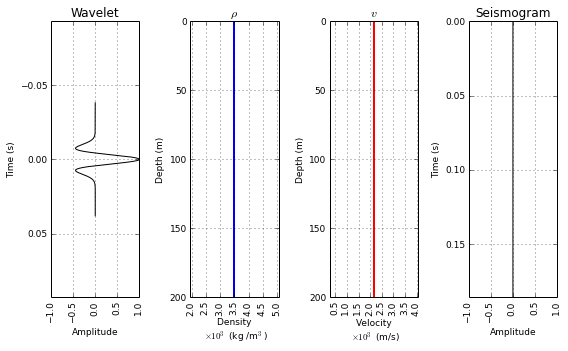

In [7]:
interact(plotSeismogramInteract,d2=(0.,150.,1),d3=(50.,200.,1),rho1=(2000.,5000.,50.),rho2=(2000.,5000.,50.),rho3=(2000.,5000.,50.),v1=(300.,4000.,50.),v2=(300.,4000.,50.),v3=(300.,4000.,50.),wavf=(5.,100.,2.5),wavA=(-0.5,1.,0.25),addNoise=False,usingT=True) 

Using the interactive cell above, construct the model shown below. You will need to adjust the value of v2. Set the amplitude of the input pulse to 1.
<img src="./Figures/fig.png" style="width: 50%; height: 50%"></img>

<font color='red'>**
a. Here we will investigate the impact of the wavelet frequency on seismic resolution. One question that is always of interest is “how thick must a layer be before it is detectable?”. Using the model in step 4 as a starting point, we will fill in the following table. To compute the wavelength, λ, use the velocity of the second layer (v2) and the frequency of the input pulse. Adjust the thickness of layer 2 (h2) by adjusting the depth to the top of layer 3 (d3). For each of the frequencies listed, record the minimum h2 for which evidence of the top and bottom of the layer are visible in the seismogram.**</font>
<img src="./Figures/table.png" style="width: 40%; height: 40%"></img>
<br/>
<br/><font color='red'>**
b. Set the thickness of layer 2 to 1m. Set wavf = 100, and slowly decrease it. What happens to the amplitude of signal as the frequency is decreased?**</font>

In step 4, you can also build models and adjust any of the parameters.
<br/>
<br/>
<font color='red'>**
a. Construct a model with two positive reflection events. Include an image (in the notebook, you can right click: copy and paste it into a word document).<br/>
<br/>
b. Construct a model with two events with negative polarity. Include an image.<br/>
<br/>
c. Construct a model with one positive and one negative reflection event. Include an image.<br/>
<br/>
d. Using d2 = 75, d3 = 125, wavA = 1, construct a model which has variations in both density and velocity but does not show any evidence of the layer in the seismogram. Include an image.**</font>